In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from memory import Memory
from random import random
from model import AMTEA
import numpy as np
import time
import math
from solver import Solver
from task import *
import cProfile
import pstats
import random


In [27]:
np.random.seed(0)
random.seed(0)

In [28]:
import os, shutil
folder = 'cache/solvers'
for filename in os.listdir(folder):
	if filename in ['ga.py', 'de.py']:
		continue
	file_path = os.path.join(folder, filename)

	try:
		if os.path.isfile(file_path) or os.path.islink(file_path):
			os.unlink(file_path)
		elif os.path.isdir(file_path):
			shutil.rmtree(file_path)
	except Exception as e:
		print('Failed to delete %s. Reason: %s' % (file_path, e))

In [29]:
tasks, task_names = get_2_tasks(1)
lst_tasks = tasks

CI_M


In [30]:
for task in lst_tasks:
    print(task.task_name)

CEC_44
CEC_47


In [31]:
# lst_tasks = [GNBGTask(1, 100), GNBGTask(2, 100)]

In [32]:
amtea = AMTEA(pop_size=100, memory_size=10, lst_tasks=lst_tasks, num_solvers=2, alpha=0.2)

Initializing LLM model: gpt
Initial alpha: 0.2
Initializing 0 LLM-based solvers to choose top 2 solvers.
Solver's id: ga, exploit score: 0.7686644901156449, explore score: 0.5607315363714053
Solver's id: ga, exploit score: 0.7950138379351364, explore score: 0.5763445309418769
Solver's id: ga, exploit score: 0.7743302923862296, explore score: 0.5720175190305903
Solver's id: ga, exploit score: 0.7898685059858811, explore score: 0.5571270187722467
Solver's id: ga, exploit score: 0.7859783620081755, explore score: 0.5456820577365377
Solver's id: ga, exploit score: 0.7850450933484089, explore score: 0.5704838328918611
Solver ga, eval_score: 0.6076148854919183
Solver's id: de, exploit score: 0.7678029676748588, explore score: 0.5184072469486428
Solver's id: de, exploit score: 0.7816603998284466, explore score: 0.5321650483390439
Solver's id: de, exploit score: 0.7749603085182286, explore score: 0.5472443223614817
Solver's id: de, exploit score: 0.7797915458372615, explore score: 0.5401092387

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


In [33]:
amtea.run(eval_budget=100000, lp=70, tgap=5, k=10, up=150, delete_after_run=False)

Evaluation count: 100/100000
Alpha: 0.20000197391925673
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(21.245902272454405), 'CEC_47': np.float64(28451.852556606435)}
Evaluation count: 200/100000
Alpha: 0.20000789565754518
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(21.245902272454405), 'CEC_47': np.float64(28451.852556606435)}
Evaluation count: 300/100000
Alpha: 0.20001776515642009
Task name: CEC_44
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['ga', 'de']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(21.2459022

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: ga, exploit score: 0.9946321449073867, explore score: 0.0878366261896689
Solver's id: ga, exploit score: 0.9900347809146396, explore score: 0.1203675780256072
Solver's id: ga, exploit score: 0.9907325050390166, explore score: 0.10510391782211931
[*] Evaluation score threshold for new solver: 0.22442
Solver's id: ga, exploit score: 0.9919482783762557, explore score: 0.08417910996906927
Solver's id: ga, exploit score: 0.990293720348101, explore score: 0.12675863369241056
Solver's id: ga, exploit score: 0.9871960482934101, explore score: 0.14998150061484747
EVAL CHECK COUNT 1: 1
Solver ga, eval_score: 0.33212
Solver's id: de, exploit score: 0.9997640103003564, explore score: 0.03843663543080699
Solver's id: de, exploit score: 0.99969363651611, explore score: 0.04194917467493771
Solver's id: de, exploit score: 0.9998077478827995, explore score: 0.032426540870231224
EVAL CHECK COUNT 1: 2
Solver de, eval_score: 0.27198
Solver's id: wmbH, exploit score: 0.9973960443648696, explor

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['pZpJ', 'tBMD']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(5.345573591372183), 'CEC_47': np.float64(434.00543038174055)}
Evaluation count: 15200/100000
Alpha: 0.24474542047458217
Task name: CEC_44
List solvers: ['de', 'hbmQ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', 'tBMD']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(5.338951561770404), 'CEC_47': np.float64(432.6122195830676)}
Evaluation count: 15300/100000
Alpha: 0.24532469771977738
Task name: CEC_44
List solvers: ['de', 'hbmQ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', 'tBMD']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(5.256668284972136), 'CEC_47': np.float64(432.1909372476411)}
Evaluation count: 15400/100000
Alpha: 0.2459074754670179
Task name: CEC_44
List solver

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: pZpJ, exploit score: 0.984189702424439, explore score: 0.14936970978154895
Solver's id: pZpJ, exploit score: 0.9835286249458419, explore score: 0.1490893517326936
Solver's id: pZpJ, exploit score: 0.9875435472486903, explore score: 0.14225877929882638
[*] Evaluation score threshold for new solver: 0.31692
Solver's id: pZpJ, exploit score: 0.9876250475914882, explore score: 0.13317930608414086
Solver's id: pZpJ, exploit score: 0.9793964474730323, explore score: 0.2126766943140754
Solver's id: pZpJ, exploit score: 0.9871196550059053, explore score: 0.12724092647573004
EVAL CHECK COUNT 1: 1
Solver pZpJ, eval_score: 0.45946
Solver's id: tBMD, exploit score: 0.9888697584673308, explore score: 0.12187963808879511
Solver's id: tBMD, exploit score: 0.9937028855768641, explore score: 0.07918834616912304
Solver's id: tBMD, exploit score: 0.9914693743374702, explore score: 0.09186898071611076
EVAL CHECK COUNT 1: 2
Solver tBMD, eval_score: 0.42374
The solver combines a balance of expl

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['pZpJ', 'vJt1']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(4.251901126196895), 'CEC_47': np.float64(359.5166735122267)}
Evaluation count: 30200/100000
Alpha: 0.3669238081325696
Task name: CEC_44
List solvers: ['txb0', 'WmKs']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', 'vJt1']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(4.251901126196895), 'CEC_47': np.float64(359.3055093459287)}
Evaluation count: 30300/100000
Alpha: 0.36794621824326024
Task name: CEC_44
List solvers: ['txb0', 'WmKs']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', 'vJt1']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(4.251901126196895), 'CEC_47': np.float64(359.3055093459287)}
Evaluation count: 30400/100000
Alpha: 0.368970918631093
Task name: CEC_44
List solve

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: pZpJ, exploit score: 0.9832012970481627, explore score: 0.16818436836789327
Solver's id: pZpJ, exploit score: 0.9881881056777538, explore score: 0.12925865885734567
Solver's id: pZpJ, exploit score: 0.9813985902390747, explore score: 0.16250310039312993
[*] Evaluation score threshold for new solver: 0.41992
Solver's id: pZpJ, exploit score: 0.9850642578646656, explore score: 0.11478825375505076
Solver's id: pZpJ, exploit score: 0.9824042035084919, explore score: 0.15470819909530006
Solver's id: pZpJ, exploit score: 0.9806071841360948, explore score: 0.1986936380441361
EVAL CHECK COUNT 1: 1
Solver pZpJ, eval_score: 0.60032
Solver's id: vJt1, exploit score: 0.9882856329248461, explore score: 0.13616848017409028
Solver's id: vJt1, exploit score: 0.9905962172924454, explore score: 0.08562489783788961
Solver's id: vJt1, exploit score: 0.9931834907339859, explore score: 0.06936377516160655
EVAL CHECK COUNT 1: 2
Solver vJt1, eval_score: 0.57732
This solver blends exploration and 

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['pZpJ', '8hwv']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(295.8344353609495)}
Evaluation count: 45200/100000
Alpha: 0.5399097643516972
Task name: CEC_44
List solvers: ['txb0', 'Seff']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', '8hwv']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(295.8344353609495)}
Evaluation count: 45300/100000
Alpha: 0.5411524352645452
Task name: CEC_44
List solvers: ['txb0', 'Seff']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['pZpJ', '8hwv']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(295.8344353609495)}
Evaluation count: 45400/100000
Alpha: 0.5423956869790991
Task name: CEC_44
List solve

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: pZpJ, exploit score: 0.9790854180636988, explore score: 0.0768312436708311
Solver's id: pZpJ, exploit score: 0.9813334029963448, explore score: 0.07912104328876153
Solver's id: pZpJ, exploit score: 0.9895921637914865, explore score: 0.050007386024601905
[*] Evaluation score threshold for new solver: 0.51137
Solver's id: pZpJ, exploit score: 0.9812592847911737, explore score: 0.06545099638138853
Solver's id: pZpJ, exploit score: 0.9824893960690977, explore score: 0.07586280063853626
Solver's id: pZpJ, exploit score: 0.9816951996480834, explore score: 0.07881321885361267
EVAL CHECK COUNT 1: 1
Solver pZpJ, eval_score: 0.73073
Solver's id: 8hwv, exploit score: 0.9892470374651645, explore score: 0.05957710523498725
Solver's id: 8hwv, exploit score: 0.9849755789713978, explore score: 0.06245055482562793
Solver's id: 8hwv, exploit score: 0.9862841203486563, explore score: 0.06589156257073031
EVAL CHECK COUNT 1: 2
Solver 8hwv, eval_score: 0.73139
This solver emphasizes exploitatio

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['dsRl', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(248.91498786771876)}
Evaluation count: 60200/100000
Alpha: 0.7259946078621218
Task name: CEC_44
List solvers: ['1Xus', 'Seff']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['dsRl', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(248.9112224082742)}
Evaluation count: 60300/100000
Alpha: 0.7271866535329643
Task name: CEC_44
List solvers: ['1Xus', 'Seff']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['dsRl', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(4.137803812777975), 'CEC_47': np.float64(248.90955003019477)}
Evaluation count: 60400/100000
Alpha: 0.7283774439228838
Task name: CEC_44
List sol

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: dsRl, exploit score: 0.9873852066258394, explore score: 0.16426728040965682
Solver's id: dsRl, exploit score: 0.9954472161260499, explore score: 0.07217694917144625
Solver's id: dsRl, exploit score: 0.9908935336460737, explore score: 0.09110699131540892
[*] Evaluation score threshold for new solver: 0.62153
Solver's id: dsRl, exploit score: 0.9924600891643127, explore score: 0.11004898364479182
Solver's id: dsRl, exploit score: 0.9919025220695358, explore score: 0.08516065608675596
Solver's id: dsRl, exploit score: 0.9940017505814772, explore score: 0.08649519850377073
EVAL CHECK COUNT 1: 1
Solver dsRl, eval_score: 0.88748
Solver's id: f2Df, exploit score: 0.9925579374494293, explore score: 0.0954003918160117
Solver's id: f2Df, exploit score: 0.989290674507911, explore score: 0.13220970341616653
Solver's id: f2Df, exploit score: 0.9913478097710972, explore score: 0.12936053438036232
EVAL CHECK COUNT 1: 2
Solver f2Df, eval_score: 0.88890
This solver prioritizes exploitation

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['qM7e', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(3.973066982284234), 'CEC_47': np.float64(214.51819443350047)}
Evaluation count: 75200/100000
Alpha: 0.8846142708837141
Task name: CEC_44
List solvers: ['1Xus', '1wb2']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['qM7e', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(3.971865845690296), 'CEC_47': np.float64(214.50602027191502)}
Evaluation count: 75300/100000
Alpha: 0.8854958409105684
Task name: CEC_44
List solvers: ['1Xus', '1wb2']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['qM7e', 'f2Df']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(3.971865845690296), 'CEC_47': np.float64(214.50602027191502)}
Evaluation count: 75400/100000
Alpha: 0.8863745932087326
Task name: CEC_44
List so

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Solver's id: qM7e, exploit score: 0.991659233740352, explore score: 0.10052477495862355
Solver's id: qM7e, exploit score: 0.9897235159286021, explore score: 0.11470834282500829
Solver's id: qM7e, exploit score: 0.9935181639381538, explore score: 0.09555952883833438
[*] Evaluation score threshold for new solver: 0.68197
Solver's id: qM7e, exploit score: 0.9973986035376834, explore score: 0.04210277564247405
Solver's id: qM7e, exploit score: 0.9922982501642629, explore score: 0.10037282190120825
Solver's id: qM7e, exploit score: 0.9954482307488113, explore score: 0.07129182989974053
EVAL CHECK COUNT 1: 1
Solver qM7e, eval_score: 0.97696
Solver's id: f2Df, exploit score: 0.9929159206101417, explore score: 0.09318318111821319
Solver's id: f2Df, exploit score: 0.9897895337578279, explore score: 0.13989045635265623
Solver's id: f2Df, exploit score: 0.992429680798686, explore score: 0.09225901329948274
EVAL CHECK COUNT 1: 2
Solver f2Df, eval_score: 0.97442
This solver focuses on elite solutio

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: CEC_47
List solvers: ['qM7e', 'Fgt5']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'CEC_44': np.float64(3.8140261670730173), 'CEC_47': np.float64(210.2126573087465)}
Evaluation count: 90200/100000
Alpha: 0.9811917366068876
Task name: CEC_44
List solvers: ['1Xus', '1wb2']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['qM7e', 'Fgt5']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'CEC_44': np.float64(3.813802870633826), 'CEC_47': np.float64(210.2125628402917)}
Evaluation count: 90300/100000
Alpha: 0.9815706602269574
Task name: CEC_44
List solvers: ['1Xus', '1wb2']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: CEC_47
List solvers: ['qM7e', 'Fgt5']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 3:
{'CEC_44': np.float64(3.813797272846895), 'CEC_47': np.float64(210.2125628402917)}
Evaluation count: 90400/100000
Alpha: 0.9819458178986573
Task name: CEC_44
List solv

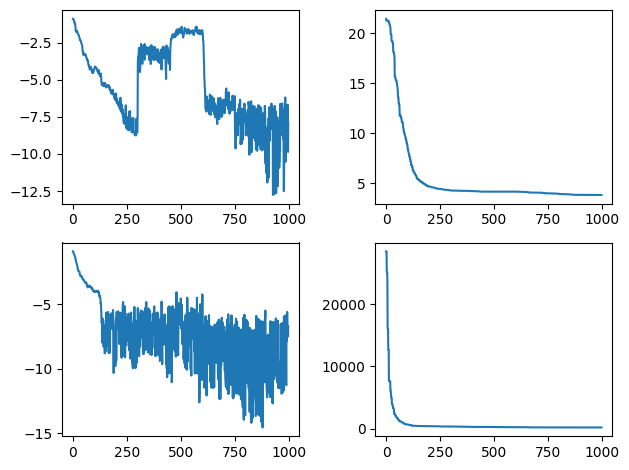

In [34]:
amtea.render_history()

In [35]:
u = np.random.uniform(size=(10, 5))
centroid = np.mean(u, axis=0)
print(centroid)

[0.70439301 0.44972646 0.56819859 0.54642447 0.47154415]


In [36]:
np.mean(np.linalg.norm(u - centroid, axis=1))

np.float64(0.5740811423667144)

In [37]:
a_s = 0.2
T = 1000
ls_a = []
for t in range(T):
    u = t / T
    a = a_s + (1 - a_s) * (1 - math.cos(math.pi * u)) / 2
    ls_a.append(a)

In [38]:
from matplotlib import pyplot as plt

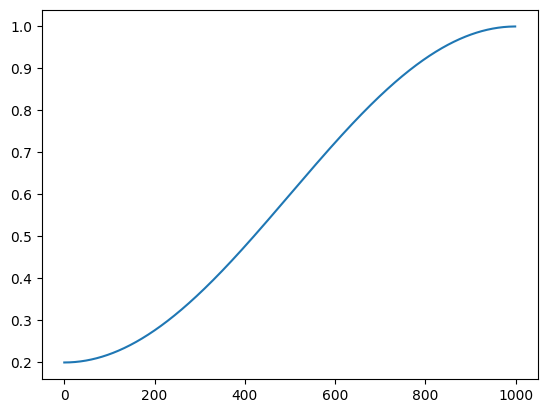

In [39]:
plt.plot(ls_a)